In [489]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [ ]:
#Task 3

Task 3 predicting teams for finals

In [460]:
#General function to fetch odi data
#The data extracted is about 4 teams only because they have qualified for Semis
def teams(url):
  teamss = ['India','South Africa','New Zealand','Australia']
  all_table = pd.read_html(url)
  df =all_table[0]
  filtered_df = df[df['Team 1'].isin(teamss) & df['Team 2'].isin(teamss)]
  return filtered_df

Extracting Odi data yearwise (website used: ESPNcrickinfo)

In [461]:
odi2015 = teams("https://www.espncricinfo.com/records/year/team-match-results/2015-2015/one-day-internationals-2")

In [462]:
odi2016 = teams("https://www.espncricinfo.com/records/year/team-match-results/2016-2016/one-day-internationals-2")

In [463]:
odi2017 = teams("https://www.espncricinfo.com/records/year/team-match-results/2017-2017/one-day-internationals-2")

In [464]:
odi2018 = teams("https://www.espncricinfo.com/records/year/team-match-results/2018-2018/one-day-internationals-2")

In [465]:
odi2019 = teams("https://www.espncricinfo.com/records/year/team-match-results/2019-2019/one-day-internationals-2")

In [466]:
odi2020 = teams("https://www.espncricinfo.com/records/year/team-match-results/2020-2020/one-day-internationals-2")

In [467]:
odi2021 = teams("https://www.espncricinfo.com/records/year/team-match-results/2021-2021/one-day-internationals-2")

In [468]:
odi2022 = teams("https://www.espncricinfo.com/records/year/team-match-results/2022-2022/one-day-internationals-2")

In [469]:
odi2023 = teams("https://www.espncricinfo.com/records/year/team-match-results/2023-2023/one-day-internationals-2")

In [470]:
odi_data_all = pd.concat([odi2015, odi2016, odi2017, odi2018, odi2019, odi2020, odi2021, odi2022, odi2023], ignore_index=True)

In [471]:
odi_data = odi_data_all.copy()

In [472]:
odi_data_all.to_csv("odi_data.csv")

In [473]:
odi_data.shape

(129, 7)

In [490]:
odi_data.head()

,Team_A,Team_B,Winner,Margin,Ground,Match Date,Scorecard,Year
0,Australia,India,Australia,4 wickets,Melbourne,2015-01-18,ODI # 3582,2015
1,Australia,India,no result,-,Sydney,2015-01-26,ODI # 3592,2015
2,India,South Africa,India,130 runs,Melbourne,2015-02-22,ODI # 3610,2015
3,New Zealand,Australia,New Zealand,1 wicket,Auckland,2015-02-28,ODI # 3617,2015
4,New Zealand,South Africa,New Zealand,4 wickets,Auckland,2015-03-24,ODI # 3644,2015


In [475]:
odi_data.tail()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
124,Australia,South Africa,South Africa,134 runs,Lucknow,"Oct 12, 2023",ODI # 4667
125,India,New Zealand,India,4 wickets,Dharamsala,"Oct 22, 2023",ODI # 4678
126,Australia,New Zealand,Australia,5 runs,Dharamsala,"Oct 28, 2023",ODI # 4684
127,New Zealand,South Africa,South Africa,190 runs,Pune,"Nov 1, 2023",ODI # 4689
128,India,South Africa,India,243 runs,Eden Gardens,"Nov 5, 2023",ODI # 4694


In [476]:
odi_data = odi_data.rename(columns={'Team 1': 'Team_A', 'Team 2': 'Team_B'})

In [477]:
odi_data['Match Date'] = pd.to_datetime(odi_data['Match Date'])

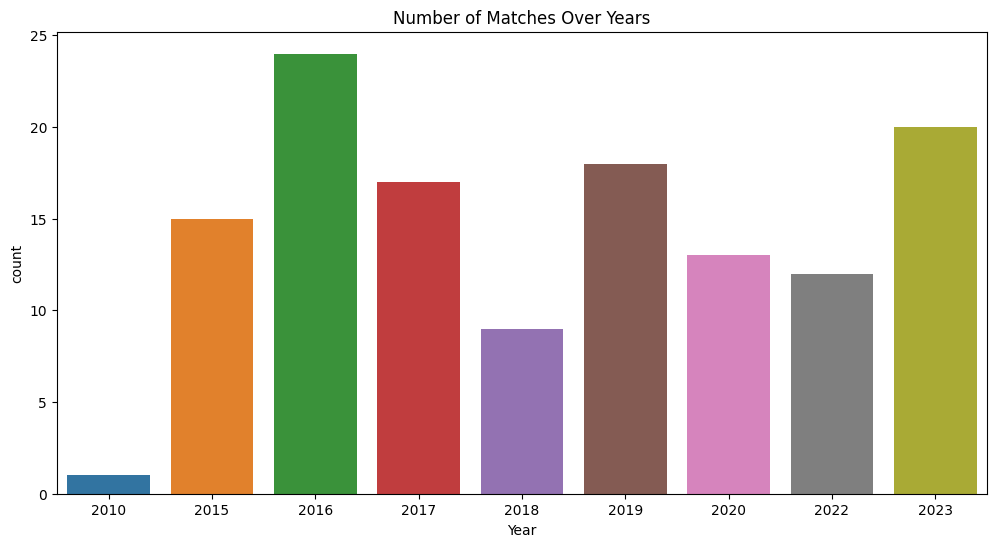

In [479]:
#Matches played over years
plt.figure(figsize=(12, 6))
odi_data['Year'] = odi_data['Match Date'].dt.year
sns.countplot(x='Year', data=odi_data)
plt.title('Number of Matches Over Years')
plt.show()

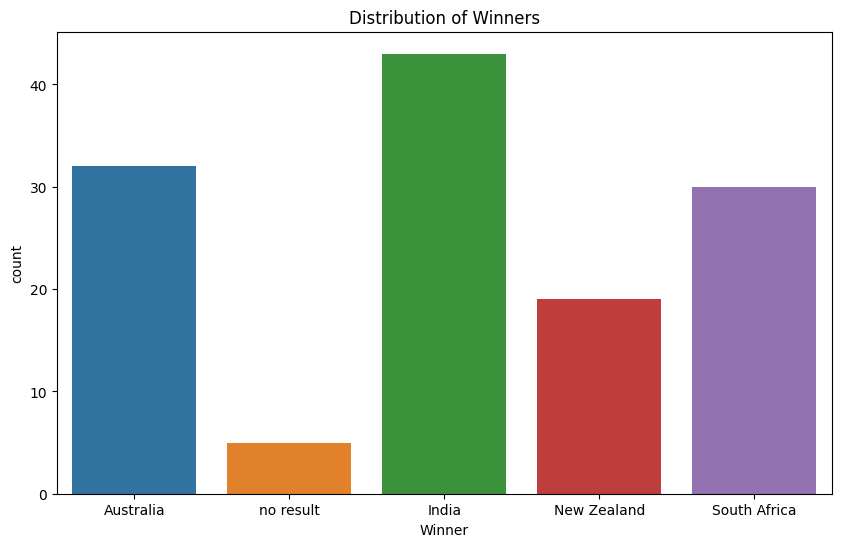

In [480]:
#Win counts by each team
plt.figure(figsize=(10, 6))
sns.countplot(x='Winner', data=odi_data)
plt.title('Distribution of Winners')
plt.show()

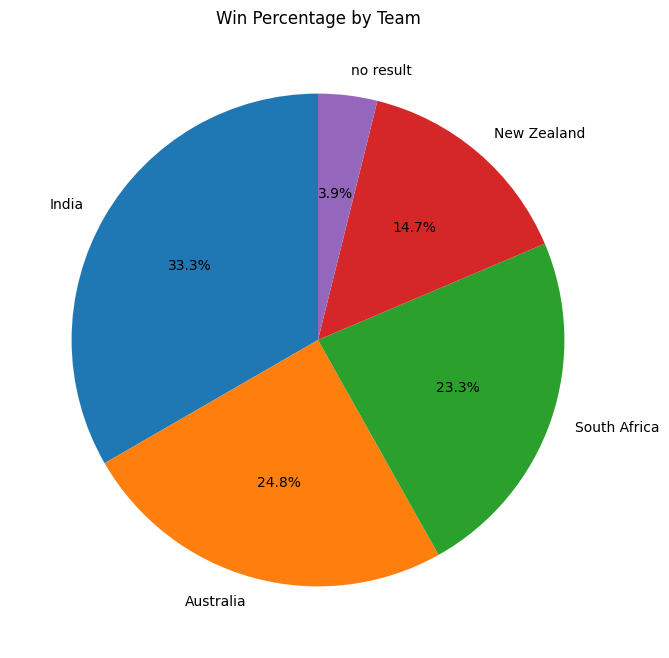

In [481]:
# Win percentage pie plot
win_counts = odi_data['Winner'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(win_counts, labels=win_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Win Percentage by Team')
plt.show()

In [428]:
#Encoding the data
label_encoder = LabelEncoder()
for column in odi_data.columns:
    # Check if the column data type is object
    if odi_data[column].dtype == 'object':
        # Use LabelEncoder to encode the categorical values
        odi_data[column] = label_encoder.fit_transform(odi_data[column])

In [429]:
#Calculating Correlation
cor = odi_data.corr()

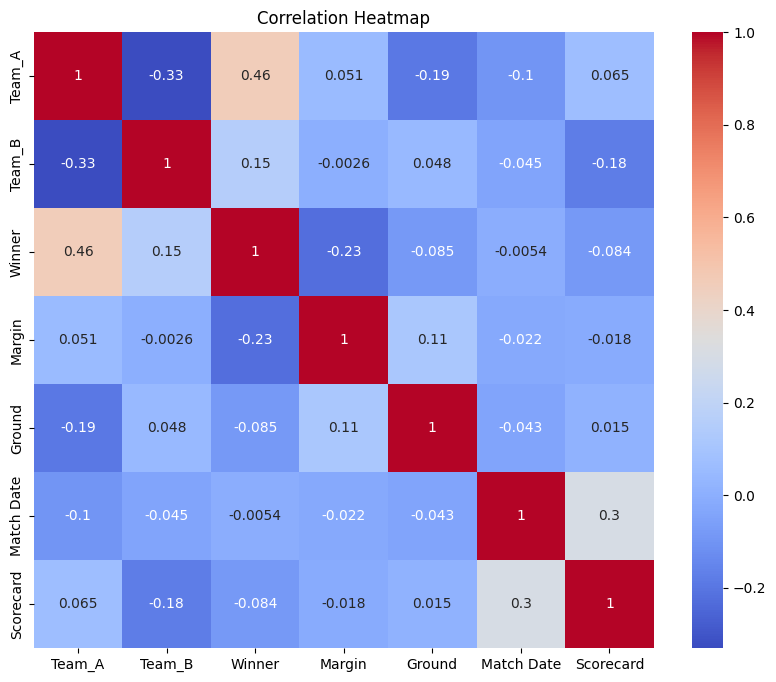

In [430]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [431]:
#Dropping columns because of low co-relation and dropping margin because when we predict we won't give margin as feature as we can't predict
#margin manually before the match.
colss = ['Margin','Scorecard','Match Date']
odi_data.drop(columns = colss,inplace =True)
odi_data_all.drop(columns = colss,inplace =True)

Extracting ICC odi rankings of teams

In [432]:
url1 = "https://www.espncricinfo.com/rankings/content/page/211271.html"

In [433]:
icc_ranking_table = pd.read_html(url1)

In [434]:
rankings = icc_ranking_table[1]

In [435]:
rankings.head()

,Pos,Team,Matches,Points,Rating
0,1,India,53,6421,121
1,2,Australia,40,4592,115
2,3,South Africa,33,3685,112
3,4,Pakistan,36,3922,109
4,5,New Zealand,42,4328,103


In [436]:
filtered_rankings = rankings[:5]

In [437]:
print(filtered_rankings)

   Pos          Team  Matches  Points  Rating
0    1         India       53    6421     121
1    2     Australia       40    4592     115
2    3  South Africa       33    3685     112
3    4      Pakistan       36    3922     109
4    5   New Zealand       42    4328     103


In [438]:
urll = "https://www.careerpower.in/cricket-world-cup-winners-list.html"

In [439]:
app = pd.read_html(urll)

In [440]:
final_appearences = app[1]
teamss = ['India','South Africa','New Zealand','Australia']
final_appearences = final_appearences[final_appearences[0].isin(teamss)]
final_appearences.head()

,0,1,2,3,4,5
1,Australia,7,5,2,"1987, 1999, 2003, 2007, 2015","1975, 1996"
3,India,3,2,1,"1983, 2011",2003
4,New Zealand,2,0,2,-,"2015, 2019"


Gathering information about how many times a team has been in finals and how many times a team has won.

In [441]:
final_appearences.rename(columns={0: 'Team',1:"Total_Finals",2:"Won",3:"Runner_up"}, inplace=True)

<ipython-input-441-854e3098e48a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_appearences.rename(columns={0: 'Team',1:"Total_Finals",2:"Won",3:"Runner_up"}, inplace=True)


In [442]:
#Dropping columns which are of no use
final_appearences.drop(columns=4,inplace = True)
final_appearences.drop(columns=5,inplace = True)

<ipython-input-442-3bbd42fbbbe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_appearences.drop(columns=4,inplace = True)
<ipython-input-442-3bbd42fbbbe1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_appearences.drop(columns=5,inplace = True)


In [443]:
final_appearences.head()

,Team,Total_Finals,Won,Runner_up
1,Australia,7,5,2
3,India,3,2,1
4,New Zealand,2,0,2


In [444]:
#Combining data (1) ICC Rankings (2)Final appearences
result  = pd.merge(filtered_rankings, final_appearences, how='outer')

In [445]:
result.fillna(0)

,Pos,Team,Matches,Points,Rating,Total_Finals,Won,Runner_up
0,1,India,53,6421,121,3,2,1
1,2,Australia,40,4592,115,7,5,2
2,3,South Africa,33,3685,112,0,0,0
3,4,Pakistan,36,3922,109,0,0,0
4,5,New Zealand,42,4328,103,2,0,2


In [446]:
result['Total_Finals'] = result['Total_Finals'].fillna(0).astype(int)

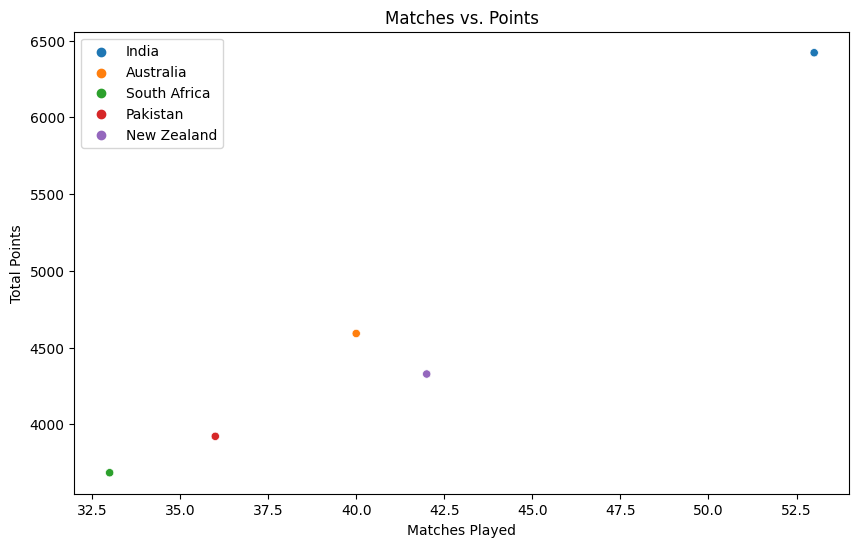

In [484]:
#Scatter plot for matches played and points gained (with respect to ICC rankings)
#example India has played most matches and have won most matches so India has more points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Matches', y='Points', data=result, hue='Team')
plt.title('Matches vs. Points')
plt.xlabel('Matches Played')
plt.ylabel('Total Points')
plt.legend()
plt.show()

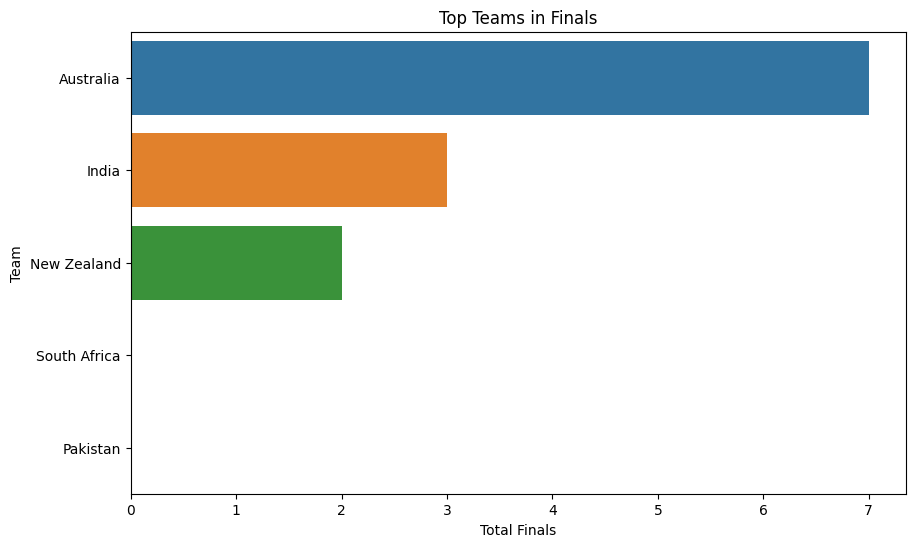

In [485]:
# Final appearences of each team
top_finals_teams = result.nlargest(5, 'Total_Finals')[['Team', 'Total_Finals']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Finals', y='Team', data=top_finals_teams)
plt.title('Top Teams in Finals')
plt.xlabel('Total Finals')
plt.ylabel('Team')
plt.show()

In [447]:
odi_data['Winner'] = odi_data_all['Winner']

In [ ]:
odi_data

In [449]:
final = pd.get_dummies(odi_data, prefix=['Team_A', 'Team_B'], columns=['Team_A', 'Team_B'])

In [ ]:
final

In [451]:
#Splitting data
X = final.drop(['Winner'], axis=1)
y = final["Winner"]
# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [452]:
#Training our model using Random Forest
rf = RandomForestClassifier(n_estimators=300, max_depth=5,random_state=0)
rf.fit(X_train, y_train)
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.811
Test set accuracy:  0.718


In [453]:
#Training our model using SGDClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=40, random_state=42)

sgd_classifier.fit(X_train, y_train)

predictions = sgd_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5641025641025641


In [454]:
#Training our model using CNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encoding data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Input layer for numeric features
input_layer = Input(shape=(X_train.shape[1],), name='numeric_input')

# 2 dense layers with 64 and 32 neurons each respectively
dense1 = Dense(64, activation='relu')(input_layer)
dense2 = Dense(32, activation='relu')(dense1)

# Output layer for classification
output_layer = Dense(len(label_encoder.classes_), activation='softmax', name='output')(dense2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))
model.save('CWC_CNN.h5')

score = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


Epoch 1/10
3/3 [==============================] - 1s 113ms/step - loss: 1.6383 - accuracy: 0.2889 - val_loss: 1.5537 - val_accuracy: 0.4359
Epoch 2/10
3/3 [==============================] - 0s 22ms/step - loss: 1.5622 - accuracy: 0.3667 - val_loss: 1.4878 - val_accuracy: 0.4615
Epoch 3/10
3/3 [==============================] - 0s 22ms/step - loss: 1.4987 - accuracy: 0.4111 - val_loss: 1.4282 - val_accuracy: 0.4872
Epoch 4/10
3/3 [==============================] - 0s 22ms/step - loss: 1.4388 - accuracy: 0.5333 - val_loss: 1.3753 - val_accuracy: 0.5385
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 1.3859 - accuracy: 0.5667 - val_loss: 1.3271 - val_accuracy: 0.5385
Epoch 6/10
3/3 [==============================] - 0s 27ms/step - loss: 1.3388 - accuracy: 0.5444 - val_loss: 1.2812 - val_accuracy: 0.5641
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 1.2930 - accuracy: 0.5556 - val_loss: 1.2366 - val_accuracy: 0.5641
Epoch 8/10
3/3 [==========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [181]:
#Function to predict which team will win based on provided 2 teams
#matches = Team1 vs Team2
#filtered_rankings = combined ICC rankings and final_appearences
#Final is the dataset used for training
#logreg = model to be used
def predictt(matches, filtered_rankings, final, logreg):

    # Variables for ICC ranking position and wins out of total appearneces of finals
    positions = []
    winn = []
    # Loop to retrieve each team's position and wins according to ICC ranking and final_appearences respectively
    for match in matches:
        positions.append(filtered_rankings.loc[filtered_rankings['Team'] == match[0],'Pos'].iloc[0])
        positions.append(filtered_rankings.loc[filtered_rankings['Team'] == match[1],'Pos'].iloc[0])
        winn.append(filtered_rankings.loc[filtered_rankings['Team'] == match[0],'Total_Finals'].iloc[0])
        winn.append(filtered_rankings.loc[filtered_rankings['Team'] == match[1],'Total_Finals'].iloc[0])

    # Creating the variable for prediction
    pred_set = []

    i = 0
    j = 0

    # 'i' will iterate the 'positions' and 'wins' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position and win record of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1] and winn[i] > winn[i+1]:
            dict1.update({'Team_A': matches[j][0], 'Team_B': matches[j][1]})
        else:
            dict1.update({'Team_A': matches[j][1], 'Team_B': matches[j][0]})

        # Append updated dictionary to the list
        pred_set.append(dict1)
        i += 2
        j += 1

        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    pred_set = pd.get_dummies(pred_set, prefix=['Team_A', 'Team_B'], columns=['Team_A', 'Team_B'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")

In [182]:
#The semi finalist teams
semi = [('India','New Zealand'),
            ('Australia', 'South Africa')]

In [183]:
#Our predictions for semifinal winners using Random Forest
predictt(semi, result, final, rf)

New Zealand and India
Winner: India

South Africa and Australia
Winner: Australia



Task 2

In [184]:
#Our prediction on Finals winner using Random Classifier
#Task 2
finals = [('India', 'Australia')]
predictt(finals, result, final, rf)

India and Australia
Winner: Australia



Task 3

In [185]:
#Our predictions for semifinal winners using SGD Classifier
predictt(semi, result, final, sgd_classifier)

New Zealand and India
Winner: India

South Africa and Australia
Winner: Australia



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


Task 2

In [186]:
#Our prediction on Finals winner using SGD

#Task 3
predictt(finals, result, final, sgd_classifier)

India and Australia
Winner: Australia



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


Task 3

In [ ]:
#TASK 2

Task 2 Predicting playing 11 of our predicted finalist teams

In [374]:
#General function to convert datatype to int or float
def convert_columns_to_numeric(combined_data):

    combined_data['Inns_x'] = pd.to_numeric(combined_data['Inns_x'], errors='coerce')
    combined_data['Ave_x'] = pd.to_numeric(combined_data['Ave_x'], errors='coerce')


    combined_data['HS'] = pd.to_numeric(combined_data['HS'], errors='coerce')
    combined_data['Ave_y'] = pd.to_numeric(combined_data['Ave_y'], errors='coerce')
    combined_data['Econ'] = pd.to_numeric(combined_data['Econ'], errors='coerce')
    combined_data['SR_y'] = pd.to_numeric(combined_data['SR_y'], errors='coerce')
    combined_data['Ct'] = pd.to_numeric(combined_data['Ct'], errors='coerce')


    combined_data['Inns_x'] = combined_data['Inns_x'].fillna(0).astype(int)
    combined_data['HS'] = combined_data['HS'].fillna(0).astype(int)
    combined_data['Ct'] = combined_data['Ct'].fillna(0).astype(int)


    combined_data['Ave_x'] = combined_data['Ave_x'].fillna(0.0).astype(float)
    combined_data['Ave_y'] = combined_data['Ave_y'].fillna(0.0).astype(float)
    combined_data['Econ'] = combined_data['Econ'].fillna(0.0).astype(float)
    combined_data['SR_y'] = combined_data['SR_y'].fillna(0.0).astype(float)

In [389]:
#Model for predicting playing 11
def predd(df):
    # Features for prediction
    batting_features = ['Mat_x', 'Inns_x', 'NO', 'Runs', 'HS', 'Ave_x', 'SR_x']
    bowling_features = ['Mat_y', 'Inns_y', 'Overs', 'Wkts', 'Ave_y', 'Econ', 'SR_y', 'prev_match']

    # Fill missing values if any
    df['Mat_y'] = df['Mat_y'].fillna(0)
    df = df.fillna(0)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[batting_features + bowling_features].drop(['prev_match'], axis=1))

    # Using Sequential CNN Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(len(batting_features) + len(bowling_features) - 1,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for probability prediction

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(X_scaled, df['prev_match'], epochs=10, batch_size=4)

    # Using the model to predict the probability of playing in the next match
    predictions = model.predict(X_scaled)

    # Add the predicted probability to the DataFrame
    df['Predicted_Probability'] = predictions.flatten()
    df_sorted = df.sort_values(by='Predicted_Probability', ascending=False)

    return df_sorted[['Player', 'Predicted_Probability']]

In [349]:
#General function to retrieve information about batsman of each team
def batting(url):
  all_table = pd.read_html(url)
  df =all_table[0]
  return df

In [364]:
Indian_player_Batsman = batting("https://www.espncricinfo.com/records/tournament/averages-batting-bowling-by-team/icc-cricket-world-cup-2023-24-15338?team=6")

In [365]:
drop_colss = ['100' ,	'50' ,	'0', 	'4s' ,	'6s','BF']

In [366]:
Indian_player_Batsman.drop(columns = drop_colss,inplace = True)

In [367]:
Indian_player_Batsman.replace('-', 0, inplace=True)
Indian_player_Batsman.dropna(inplace=True)

In [368]:
dropss = ['5','10','St','Mdns','Span','Runs','BBI']

In [369]:
Indian_player_Bowling = pd.read_html("https://www.espncricinfo.com/records/tournament/averages-batting-bowling-by-team/icc-cricket-world-cup-2023-24-15338?team=6")
Indian_player_Bowling = Indian_player_Bowling[1]

In [370]:
Indian_player_Bowling.drop(columns = dropss,inplace = True)

In [371]:
Indian_player_Bowling.replace('-',0,inplace = True)

In [372]:
India_11_combined = pd.merge(Indian_player_Batsman, Indian_player_Bowling, on='Player', how='outer')

In [375]:
convert_columns_to_numeric(India_11_combined)

In [378]:
India_11_combined.to_csv("India_11.csv")

In [383]:
#We have added one more feature manually that which player played last match
India_11 = pd.read_csv("/content/India_11.csv")

In [384]:
India_11.drop(columns = 'Unnamed: 0',inplace=True)

In [390]:
#Training the model for Indian Team
pred_India_11 = predd(India_11)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.7774 - accuracy: 0.3333
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6747 - accuracy: 0.4667
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.5963 - accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.9333
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.9333
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.9333
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.3744 - accuracy: 0.9333
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.3354 - accuracy: 0.9333
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 65ms/step


In [392]:
#Predicted 11 for the Indian team
print(pred_India_11[['Player', 'Predicted_Probability']].head(11))

            Player  Predicted_Probability
0          V Kohli               0.901063
1          SS Iyer               0.901014
2         KL Rahul               0.895565
3        RG Sharma               0.876985
5     Shubman Gill               0.814948
11   Kuldeep Yadav               0.772601
8        JJ Bumrah               0.763356
4        RA Jadeja               0.744940
13  Mohammed Siraj               0.710075
9   Mohammed Shami               0.693964
7         SA Yadav               0.662486


In [393]:
Australia_player_Batsman = batting("https://www.espncricinfo.com/records/tournament/averages-batting-bowling-by-team/icc-cricket-world-cup-2023-24-15338?team=2")

In [394]:
Australia_player_Batsman.drop(columns = drop_colss,inplace = True)

In [396]:
Australia_player_Batsman.replace('-', 0, inplace=True)

In [397]:
Australia_player_Bowler = pd.read_html("https://www.espncricinfo.com/records/tournament/averages-batting-bowling-by-team/icc-cricket-world-cup-2023-24-15338?team=2")
Australia_player_Bowler = Australia_player_Bowler[1]

In [399]:
Australia_player_Bowler.drop(columns = dropss,inplace = True)

In [400]:
Australia_player_Bowler.replace('-',0,inplace = True)

In [401]:
Australia_11 = pd.merge(Australia_player_Batsman, Australia_player_Bowler, on='Player', how='outer')

In [403]:
convert_columns_to_numeric(Australia_11)

In [405]:
Australia_11.to_csv("Australia_11.csv")

In [406]:
#We have added one more feature manually that which player played last match
Australia_11 = pd.read_csv("/content/Australia_11.csv")

In [407]:
Australia_11.drop(columns = 'Unnamed: 0',inplace=True)

In [408]:
#Training the model for Australian Team
pred_Australia_11 = pred(Australia_11)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.4999 - accuracy: 0.8667
Epoch 2/10
1/1 [==============================] - 0s 14ms/step - loss: 0.4734 - accuracy: 0.9333
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 0.4485 - accuracy: 0.9333
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 0.4244 - accuracy: 0.9333
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.4016 - accuracy: 0.9333
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3796 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.3588 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 0.3393 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3207 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 59ms/step


In [409]:
#Predicted 11 for the Australian team
print(pred_Australia_11[['Player']].head(11))

           Player
2       DA Warner
0      GJ Maxwell
1        MR Marsh
3       SPD Smith
4   M Labuschagne
10        A Zampa
6      PJ Cummins
9       JP Inglis
12   JR Hazlewood
11       MA Starc
5         TM Head
